# Fig Single Training

In [1]:
%pwd  #look at the current work dir
%cd  /eris/u/jschubert/optimbias
import sys
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('meta_rl/src')
sys.path.append('rw_model/src')
from rw_fitting import predict_exp

/eris/u/jschubert/optimbias


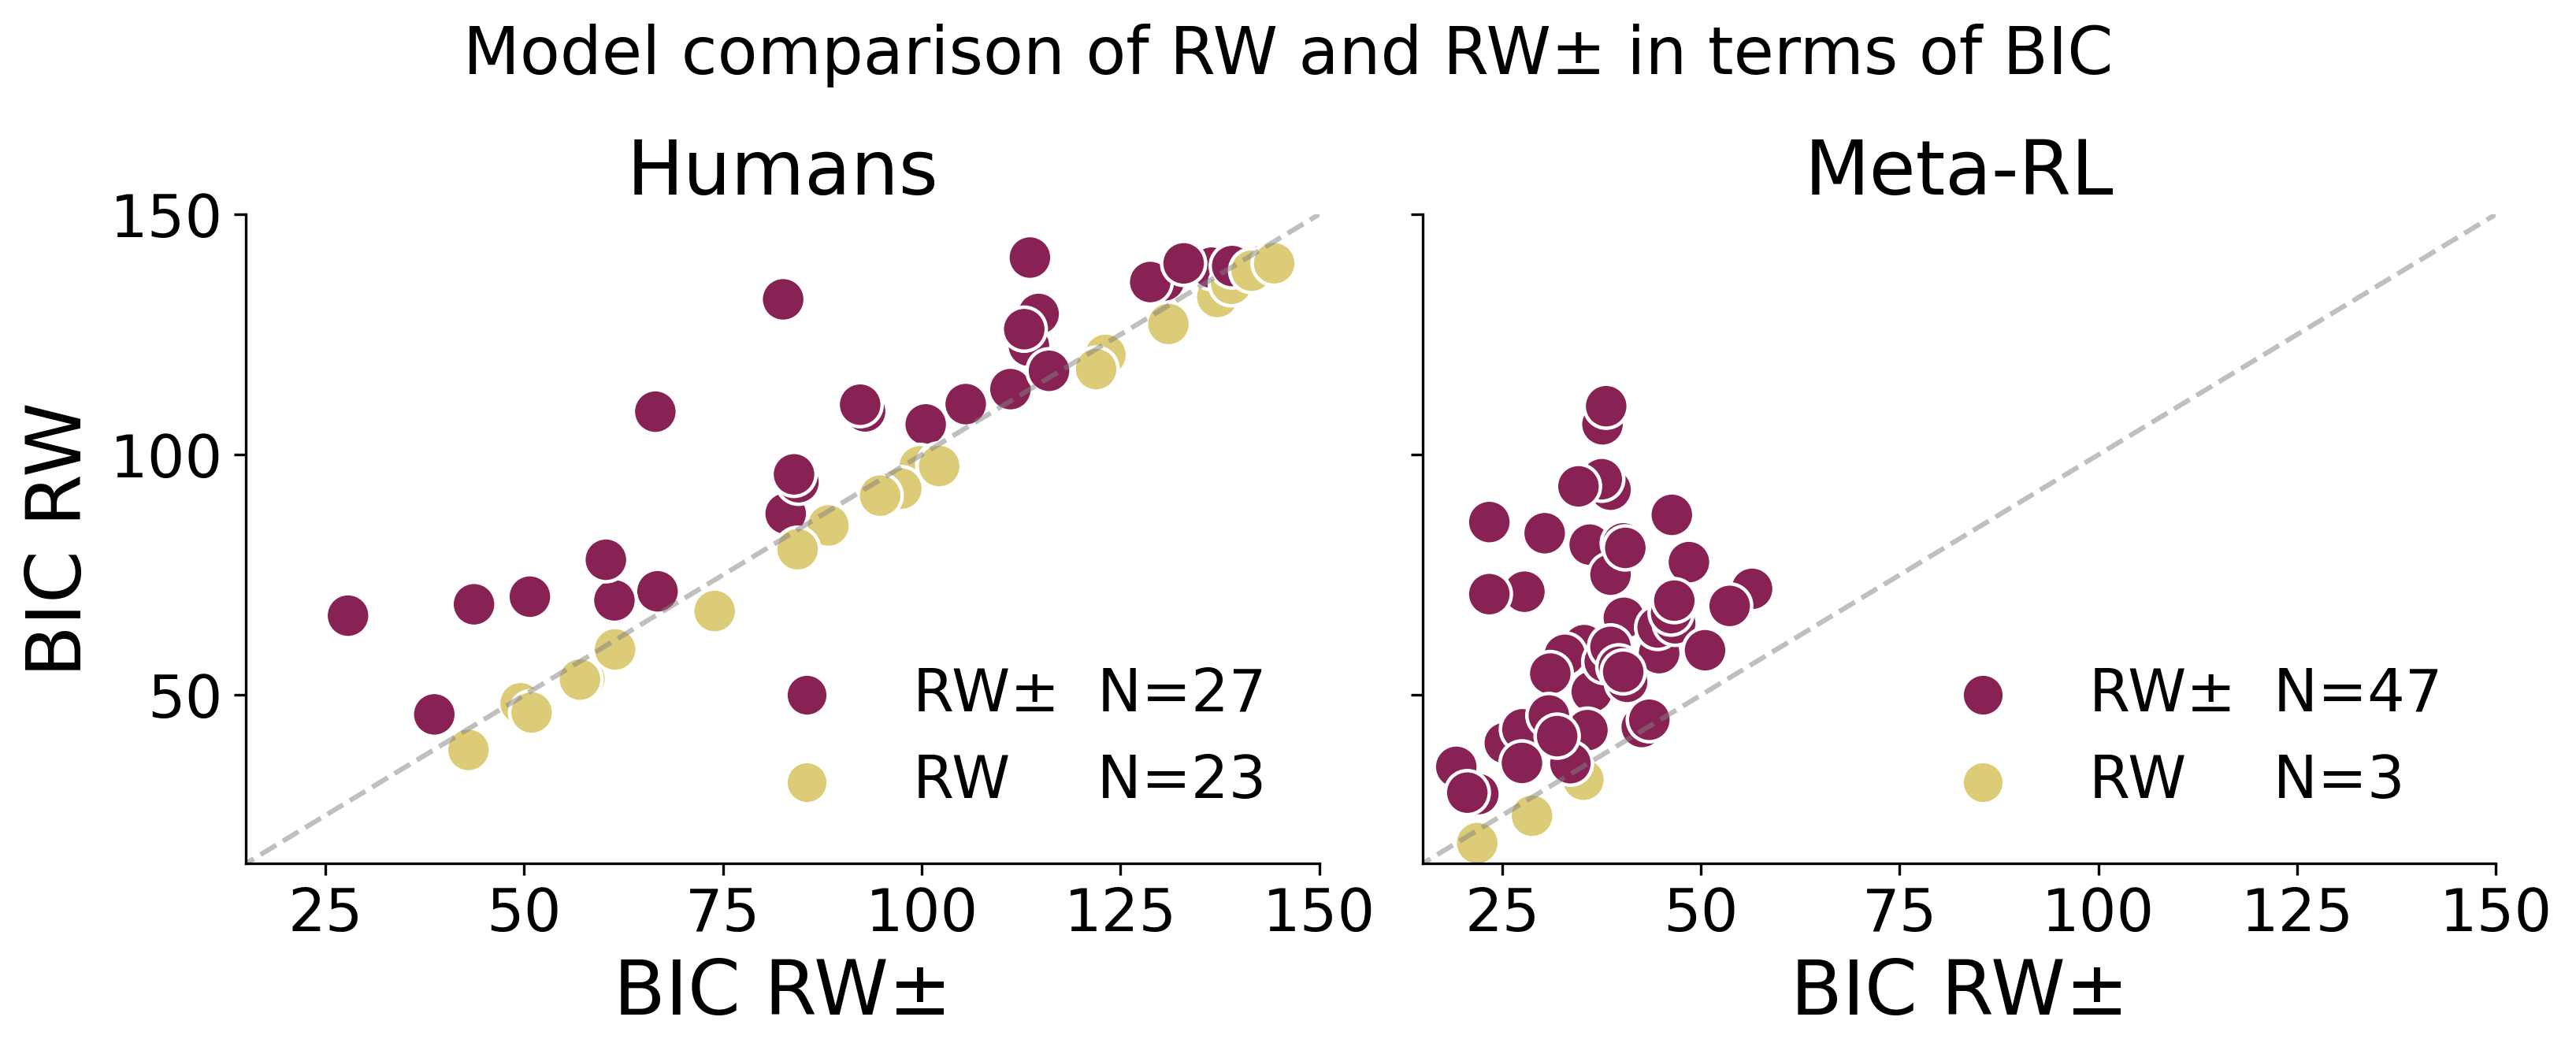

In [2]:
df = pd.read_csv('/u/jschubert/optimbias/dat/ccn/rw_fitted_500k_latest_04_23_rew_during_test_0.5.csv')
df.head()

fig, axs = plt.subplots(1,2, dpi=300, figsize=(11,4.5), sharey=True)
axs = axs.flatten()
title= ['Humans', 'Meta-RL']
df_str = ['orig', 'rewards set to 0.5 while testing']


for i, str_df in enumerate(df_str):   
    ax = axs[i]
    plt_df = df[df.source == str_df]
    sns.scatterplot( x=plt_df[('pm_bic')], y=plt_df[('c_bic')], hue=plt_df['is_pm'], ax=ax, palette=['#DDCC77', '#882255'], s=180)
    sns.despine(ax=ax)
    ax.plot([0,150],[0,150],linestyle='dashed',color='grey',alpha=.5)
    ax.set_xlim((15,150))
    ax.set_ylim((15,150))
    ax.set_ylabel('BIC RW', fontsize=23)
    ax.set_xlabel('BIC RW±', fontsize=23)
    ax.tick_params(labelsize=18)
    rwpm = str(np.sum(plt_df.is_pm))
    nrwpm = str(np.sum(~plt_df.is_pm))

    ax.set_title(title[i], fontsize=23)

    # replace legend with text "Subjects" False = RW, True = RW±
    handles, labels = ax.get_legend_handles_labels()
    order=[1,0]
    handles = [handles[idx] for idx in order]
    ax.legend(handles= handles, labels=[f'RW± N='+rwpm, 'RW   N='+nrwpm], loc='lower right', frameon=False, fontsize=18, markerscale=1.8)

plt.suptitle('Model comparison of RW and RW± in terms of BIC', fontsize=20)
plt.tight_layout()
plt.show()


fig.tight_layout()
#fig.savefig('bic.png', format='png', bbox_inches='tight')

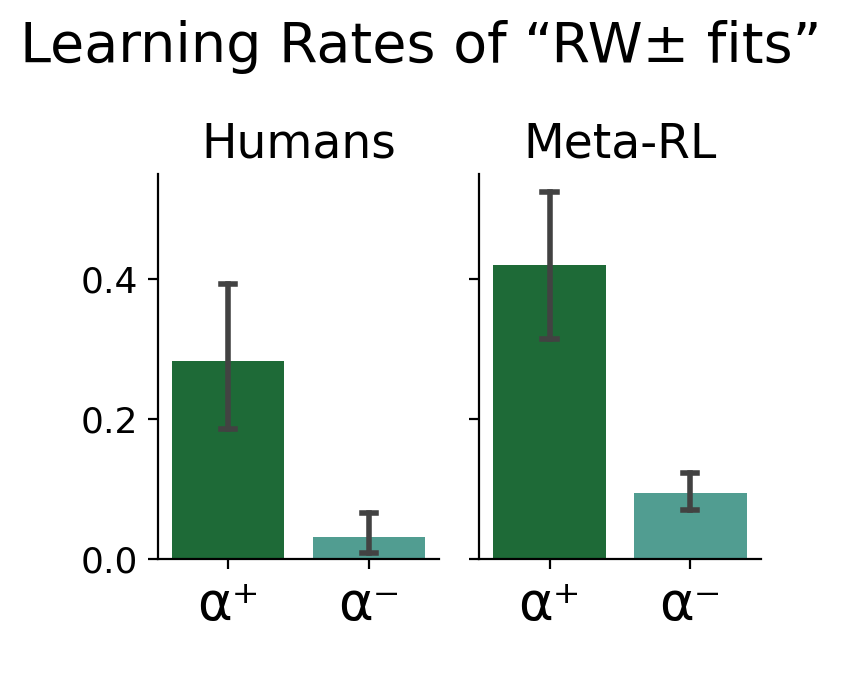

In [3]:
from statannotations.Annotator import Annotator

fig, axs = plt.subplots(1,2, figsize=(3.7,3.5), dpi=200, sharey=True)
axs = axs.flatten()

title= ['Humans', 'Meta-RL']
df_str = ['orig', 'rewards set to 0.5 while testing']

for i, str_df in enumerate(df_str):   
    ax = axs[i]
    plt_df = df[df.source == str_df]
    plt_df = plt_df[plt_df.is_pm == True]
    scatter_pm = plt_df[[('p_a'),('m_a')]]
    scatter_pm_melted = scatter_pm.melt()
    fig_args = {'x': 'variable',
                'y': 'value',
                'data': scatter_pm_melted,
                'capsize':0.1,
                'errwidth':2,
                'palette': ['#117733', '#44AA99']}
    pairs = [(('p_a', 'm_a'))]


    sns.barplot(ax=ax, **fig_args)
    sns.despine(ax=ax)
    ax.set_xticklabels(['α⁺','α⁻'], fontsize=19)
    ax.set_ylabel('')
    ax.set_xlabel(' ', fontsize=13)
    ax.tick_params(axis='y',labelsize=13)
    rwpm = np.sum(plt_df.is_pm)
    nrwpm = np.sum(~plt_df.is_pm)
    ax.set_title(title[i], fontsize=17)

    configuration = {'test': 't-test_ind',
                    'comparisons_correction':None,
                    'text_format':'star'}
    #annotator = Annotator(ax=ax, pairs=pairs, **fig_args, plot='barplot')
    #annotator.configure(**configuration).apply_test().annotate()
plt.suptitle('Learning Rates of “RW± fits”',fontsize=20)
plt.tight_layout()
plt.show()
fig.tight_layout()
#fig.savefig('lr.pdf', format='pdf', bbox_inches='tight')

# Change in Model Parameters

In [4]:
path = '/u/jschubert/optimbias/dat/influence of parameters/'


merged_df = pd.read_csv(path + 'rw_fit_of_all_simulations_w_retrained_2.csv')
p = merged_df.groupby(['discount_factor', 'entropy_coefficients']).mean(numeric_only=True).reset_index()
no_high = p.drop(p[p['discount_factor'].isin([0.9,1.0])].index)
no_high = no_high.drop(no_high[no_high['entropy_coefficients'].isin([3.24,2.1,1.36])].index)

pvt = no_high.pivot(index='entropy_coefficients',
                columns='discount_factor',
                values='is_pm')

m_df = pd.read_csv(path + 'rw_fit_of_all_hidden_size.csv')
plot_df = m_df[m_df['hidden_size'] >2]

/tmp/ipykernel_71588/3333892231.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=plot_df, x='hidden_size', y='is_pm', ax=ax, color='firebrick', linewidth=3, ci=95)


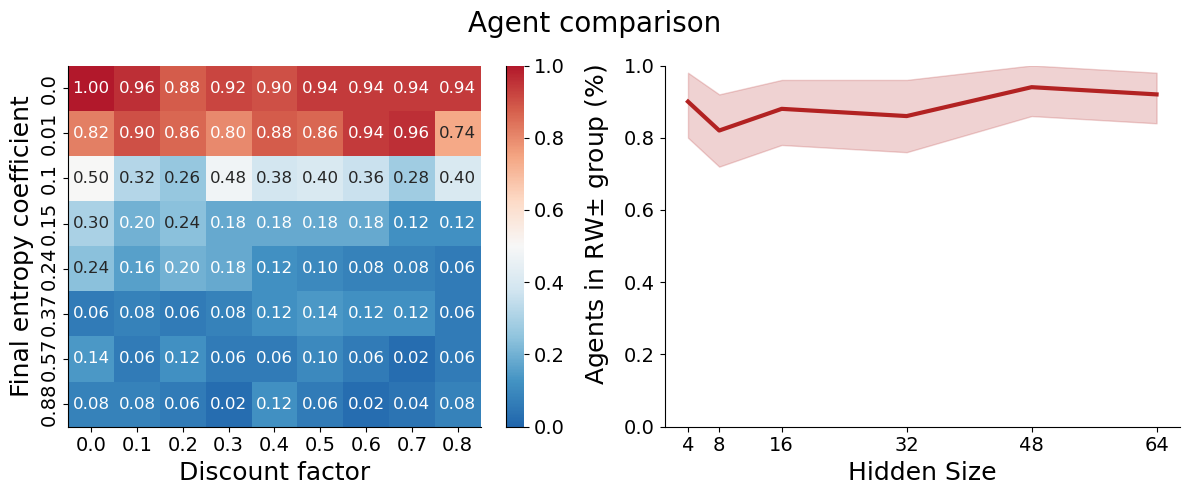

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import tol_colors as tc

# Get the 'BuRd' colormap
cmap = tc.tol_cmap('BuRd')

# Create a new figure with two subplots and set its size
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Plot 1
ax = axs[0]

# Plot the heatmap
sns.heatmap(data=pvt, annot=True, fmt='.2f', annot_kws={"fontsize":12},
            vmin=0, vmax=1, cmap=cmap, ax=ax)

#ax.figure.axes[-1].yaxis.label.set_size(16)
ax.figure.axes[-1].tick_params(labelsize=14)

# Set labels and their font sizes
ax.set_xlabel('Discount factor', fontsize=18)
ax.set_ylabel('Final entropy coefficient', fontsize=18)
ax.tick_params(labelsize=14)

# Plot 2
ax = axs[1]

sns.lineplot(data=plot_df, x='hidden_size', y='is_pm', ax=ax, color='firebrick', linewidth=3, ci=95)
sns.despine()

# Set x-axis tick labels
ax.set_xticks([4, 8, 16, 32, 48, 64], [4, 8, 16, 32, 48, 64])

ax.set_xlabel('Hidden Size', fontsize=18)
ax.set_ylabel(' ', fontsize=16)
#ax.set_ylabel('Agents in RW$\pm$ group (%)', fontsize=16)
fig.text(0.49, 0.55, 'Agents in RW$\pm$ group (%)', va='center', rotation='vertical', fontsize=18)

plt.suptitle('Agent comparison', fontsize=20)

ax.set_ylim(0,1)
ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()
#fig.savefig('ec_df_hs.pdf', format='pdf', bbox_inches='tight')

# Confirmation Bias

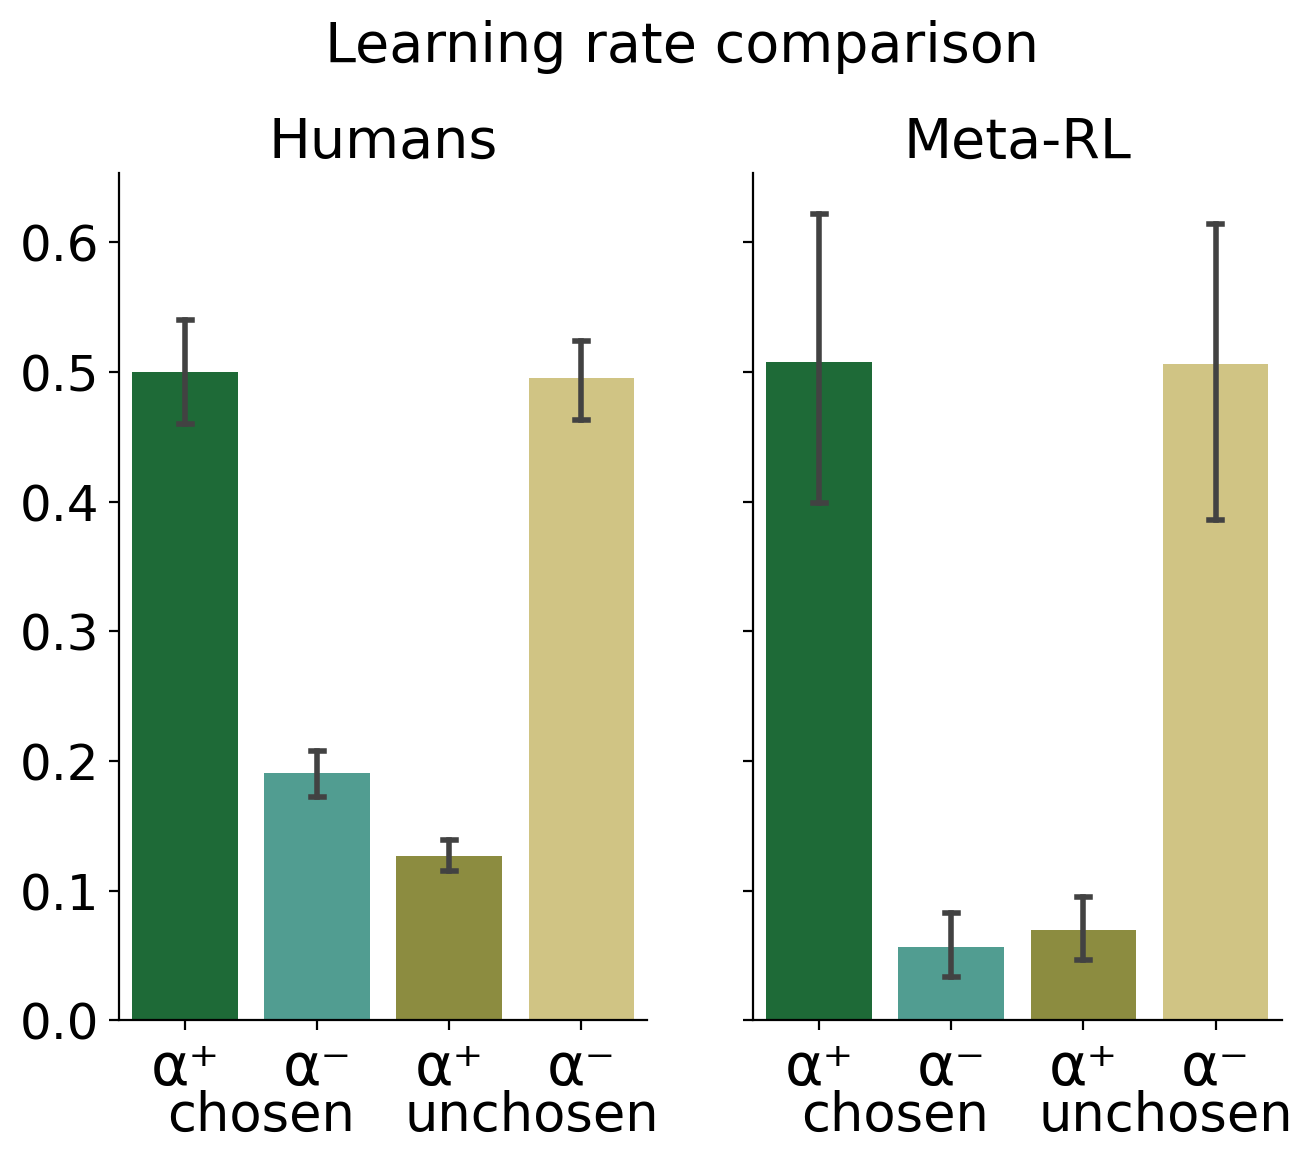

In [7]:
base_path = '/eris/scratch/jschubert/training/different_rew/'
df = pd.read_csv(path + 'df_rew_both.csv')

part = pd.DataFrame({
    'participant': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'p_a' : [0.5,0.5,0.5,0.42,0.58,0.42,0.58,0.42,0.58,0.5],
    'm_a' : [0.2,0.2,0.2,0.15,0.22,0.15,0.22,0.15,0.22,0.2],
    'm_a_c' : [0.5,0.5,0.5,0.42,0.42,0.45,0.56,0.55,0.55,0.5],
    'p_a_c' : [0.13,0.13,0.13,0.1,0.1,0.15,0.15,0.1,0.15,0.13]
})

# %%
df_rew = df

# %%
dfs = [part,df_rew]
fig, axs = plt.subplots(1,2, figsize=(7.5,5.5), dpi=200, sharey=True)
axs = axs.flatten()
titles = ['Humans', 'Meta-RL']

for i, df in enumerate(dfs):

    ax = axs[i]

    plt_df = df
    if i == 0:
        pass
    else:
        plt_df = plt_df[plt_df.is_pm == True]

    scatter_pm = plt_df[[('p_a'),('m_a'),('p_a_c'),('m_a_c')]]
    scatter_pm_melted = scatter_pm.melt()

    fig_args = {'x': 'variable',
                'y': 'value',
                'data': scatter_pm_melted,
                'capsize':0.1,
                'errwidth':2,
                'palette': ['#117733', '#44AA99', '#999933', '#DDCC77']}
    
    ax.text(0.09, -0.13,'chosen', transform=ax.transAxes, fontsize=19)
    ax.text(0.54, -0.13,'unchosen', transform=ax.transAxes, fontsize=19)

    sns.barplot(ax=ax, **fig_args)
    sns.despine(ax=ax)
    ax.set_xticklabels(['α⁺','α⁻','α⁺','α⁻'], fontsize=21)
    ax.set_ylabel('')
    ax.set_xlabel(' ', fontsize=13)
    ax.tick_params(axis='y',labelsize=18)

    ax.set_title(titles[i], fontsize=20)

plt.suptitle('Learning rate comparison',fontsize=20, y=1.02)
plt.show()
fig.tight_layout()

#fig.savefig('lr_conf_bias.pdf', format='pdf', bbox_inches='tight')


